In [2]:
import numpy as np
from datetime import datetime
import pandas as pd
import geopandas as gpd
from metloom.pointdata import SnotelPointData, USGSPointData
from metloom.variables import SensorDescription, SnotelVariables, USGSVariables
from matplotlib import pyplot as plt
import xarray as xr

In [3]:
# Snotel Sites
THUNDER_BASIN_SNOTEL = ('990:WA:SNTL', 'Thunder Basin Snotel Site')
BEAVER_CREEK_SNOTEL = ('817:WA:SNTL', 'Beaver Creek Snotel Site')

SNOTEL_VARS = [SnotelPointData.ALLOWED_VARIABLES.SNOWDEPTH,
            SnotelPointData.ALLOWED_VARIABLES.SWE,
            SnotelPointData.ALLOWED_VARIABLES.PRECIPITATION,
            SnotelPointData.ALLOWED_VARIABLES.PRECIPITATIONACCUM,
            SnotelPointData.ALLOWED_VARIABLES.TEMP,
            SnotelPointData.ALLOWED_VARIABLES.TEMPAVG,
            SnotelPointData.ALLOWED_VARIABLES.TEMPMAX,
            SnotelPointData.ALLOWED_VARIABLES.TEMPMIN,
            SnotelPointData.ALLOWED_VARIABLES.RH]

In [ ]:
# start data and end date
start_date = datetime(1980, 1, 1)
end_date = datetime(2024, 1, 1)

# Create Snotel DataFrame
thunder_basin_data = SnotelPointData(*THUNDER_BASIN_SNOTEL).get_daily_data(start_date, end_date, variables=SNOTEL_VARS)
beaver_creek_data = SnotelPointData(*BEAVER_CREEK_SNOTEL).get_daily_data(start_date, end_date, variables=SNOTEL_VARS)
snotel_df = pd.concat([thunder_basin_data, beaver_creek_data])

No RELATIVE HUMIDITY found for Thunder Basin Snotel Site
No RELATIVE HUMIDITY found for Beaver Creek Snotel Site


In [45]:
snotel_df.head()

,,geometry,SNOWDEPTH,SNOWDEPTH_units,SWE,SWE_units,PRECIPITATION,PRECIPITATION_units,ACCUMULATED PRECIPITATION,ACCUMULATED PRECIPITATION_units,AIR TEMP,AIR TEMP_units,AVG AIR TEMP,AVG AIR TEMP_units,MAX AIR TEMP,MAX AIR TEMP_units,MIN AIR TEMP,MIN AIR TEMP_units,datasource
datetime,site,,,,,,,,,,,,,,,,,,
1987-10-20 08:00:00+00:00,817:WA:SNTL,POINT Z (-120.98950 48.52753 4310.00000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.28,degF,40.46,degF,39.92,degF,NRCS
1987-10-21 08:00:00+00:00,817:WA:SNTL,POINT Z (-120.98950 48.52753 4310.00000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-60.34,degF,-54.58,degF,39.74,degF,-60.34,degF,NRCS
1987-10-22 08:00:00+00:00,817:WA:SNTL,POINT Z (-120.98950 48.52753 4310.00000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-60.34,degF,-60.34,degF,-60.34,degF,-60.34,degF,NRCS
1987-10-23 08:00:00+00:00,817:WA:SNTL,POINT Z (-120.98950 48.52753 4310.00000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-60.34,degF,-60.34,degF,-60.34,degF,-60.34,degF,NRCS
1987-10-24 08:00:00+00:00,817:WA:SNTL,POINT Z (-120.98950 48.52753 4310.00000),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-60.34,degF,-60.34,degF,-60.34,degF,-60.34,degF,NRCS


In [ ]:
snotel_df.sort_index(level=0, inplace=True)

<Axes: >

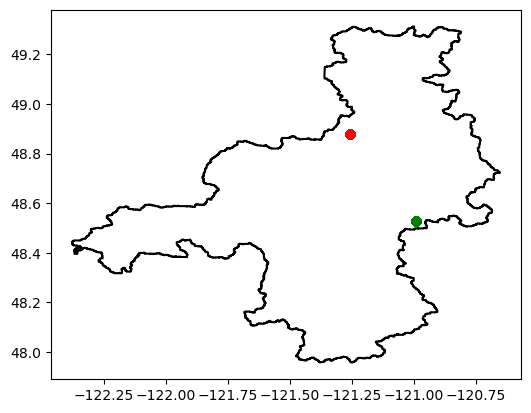

In [ ]:
# skagit_gdf.boundary
skagit_gdf = gpd.read_file('./SkagitBoundary.json')
fig, ax = plt.subplots()
skagit_gdf.boundary.plot(ax=ax, color='black')
thunder_basin_data['geometry'].plot(ax=ax,color='red')
beaver_creek_data['geometry'].plot(ax=ax,color='green')


In [ ]:
# Ensure the index is in datetime format
snotel_df.index = snotel_df.index.set_levels(snotel_df.index.levels[0].floor('D'), level=0)

In [ ]:
snotel_xr = snotel_df.to_xarray()
snotel_xr = snotel_xr.assign_coords(site=snotel_xr.site.astype(str))
snotel_xr = snotel_xr.assign_coords(datetime=pd.to_datetime(snotel_xr.datetime))

In [ ]:
# Cleanup Metadata
snotel_xr.SNOWDEPTH.attrs.update({'units': 'inches', 'Description': 'Snow Depth'})
snotel_xr.SWE.attrs.update({'units': 'inches', 'Description': 'Snow Water Equivalent'})
snotel_xr.PRECIPITATION.attrs.update({'units': 'inches', 'Description': 'Precipitation'})
snotel_xr['ACCUMULATED PRECIPITATION'].attrs.update({'units': 'inches', 'Description': 'Accumulated Precipitation'})
snotel_xr['AIR TEMP'].attrs.update({'units': 'degF', 'Description': 'Temperature'})
snotel_xr['AVG AIR TEMP'].attrs.update({'units': 'degF', 'Description': 'Average Temperature'})
snotel_xr['MAX AIR TEMP'].attrs.update({'units': 'degF', 'Description': 'Max Temperature'})
snotel_xr['MIN AIR TEMP'].attrs.update({'units': 'degF', 'Description': 'Min Temperature'})
snotel_xr.attrs.update({'Description': 'Snotel Data', 'Date Range': '1980-2024', 'Sites': 'Thunder Basin, Beaver Creek', 'Frequency': 'Daily'})
snotel_xr = snotel_xr.rename({'datetime': 'date'})

In [22]:
snotel_xr = snotel_xr[['SNOWDEPTH', 'SWE', 'PRECIPITATION', 'ACCUMULATED PRECIPITATION', 'AIR TEMP', 'AVG AIR TEMP', 'MAX AIR TEMP', 'MIN AIR TEMP']]
snotel_xr

<xarray.Dataset> Size: 2MB
Dimensions:                    (date: 13140, site: 2)
Coordinates:
  * site                       (site) <U11 88B '817:WA:SNTL' '990:WA:SNTL'
  * date                       (date) datetime64[ns] 105kB 1987-10-20T08:00:0...
Data variables:
    SNOWDEPTH                  (date, site) float64 210kB nan nan ... 21.0 22.0
    SWE                        (date, site) float64 210kB nan nan ... 9.1 6.3
    PRECIPITATION              (date, site) float64 210kB nan nan ... 0.0 0.0
    ACCUMULATED PRECIPITATION  (date, site) float64 210kB nan nan ... 29.4 24.1
    AIR TEMP                   (date, site) float64 210kB nan nan ... nan nan
    AVG AIR TEMP               (date, site) float64 210kB 40.28 nan ... 28.76
    MAX AIR TEMP               (date, site) float64 210kB 40.46 nan ... 31.1
    MIN AIR TEMP               (date, site) float64 210kB 39.92 nan ... 26.42
Attributes:
    Description:  Snotel Data
    Date Range:   1980-2024
    Sites:        Thunder Basin, Beaver Creek
    Frequency:    Daily

In [ ]:
# Write to Zarr
snotel_xr.to_zarr('./data/snotel/snotel_daily_1980_2024.zarr', mode='w')

/Users/jesse/projects/cewa568/.pixi/envs/default/lib/python3.11/site-packages/zarr/codecs/vlen_utf8.py:44: UserWarning: The codec `vlen-utf8` is currently not part in the Zarr format 3 specification. It may not be supported by other zarr implementations and may change in the future.
  return cls(**configuration_parsed)
/Users/jesse/projects/cewa568/.pixi/envs/default/lib/python3.11/site-packages/zarr/core/array.py:3991: UserWarning: The dtype `<U11` is currently not part in the Zarr format 3 specification. It may not be supported by other zarr implementations and may change in the future.
  meta = AsyncArray._create_metadata_v3(
/Users/jesse/projects/cewa568/.pixi/envs/default/lib/python3.11/site-packages/zarr/codecs/vlen_utf8.py:44: UserWarning: The codec `vlen-utf8` is currently not part in the Zarr format 3 specification. It may not be supported by other zarr implementations and may change in the future.
  return cls(**configuration_parsed)
/Users/jesse/projects/cewa568/.pixi/envs/d

In [4]:
# Test Reading Zarr
snotel_read = xr.open_zarr('./data/snotel/snotel_daily_1980_2024.zarr')
snotel_read

/Users/jesse/projects/cewa568/.pixi/envs/default/lib/python3.11/site-packages/zarr/codecs/vlen_utf8.py:44: UserWarning: The codec `vlen-utf8` is currently not part in the Zarr format 3 specification. It may not be supported by other zarr implementations and may change in the future.
  return cls(**configuration_parsed)


<xarray.Dataset> Size: 2MB
Dimensions:                    (date: 13140, site: 2)
Coordinates:
  * date                       (date) datetime64[ns] 105kB 1987-10-20T08:00:0...
  * site                       (site) object 16B '817:WA:SNTL' '990:WA:SNTL'
Data variables:
    MIN AIR TEMP               (date, site) float64 210kB ...
    MAX AIR TEMP               (date, site) float64 210kB ...
    ACCUMULATED PRECIPITATION  (date, site) float64 210kB ...
    AVG AIR TEMP               (date, site) float64 210kB ...
    SWE                        (date, site) float64 210kB ...
    AIR TEMP                   (date, site) float64 210kB ...
    SNOWDEPTH                  (date, site) float64 210kB ...
    PRECIPITATION              (date, site) float64 210kB ...
Attributes:
    Description:  Snotel Data
    Date Range:   1980-2024
    Sites:        Thunder Basin, Beaver Creek
    Frequency:    Daily

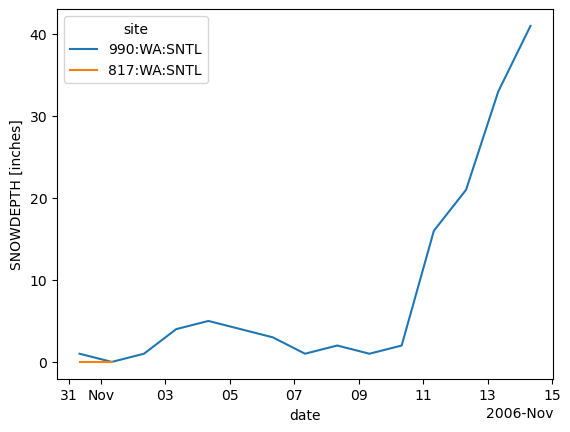

In [9]:
ar_start = '2006-10-31'
ar_end = '2006-11-14'
# snotel_read.sel(date=slice(ar_start, ar_end), site=[THUNDER_BASIN_SNOTEL[0], BEAVER_CREEK_SNOTEL[0]]).SWE.plot.line(x='date', hue='site')
snotel_read.sel(date=slice(ar_start, ar_end), site=[THUNDER_BASIN_SNOTEL[0], BEAVER_CREEK_SNOTEL[0]]).SNOWDEPTH.plot.line(x='date', hue='site')

In [11]:
# start data and end date
start_date = datetime(1980, 1, 1)
end_date = datetime(2024, 1, 1)

# Create Snotel DataFrame
thunder_basin_data = SnotelPointData(*THUNDER_BASIN_SNOTEL).get_hourly_data(start_date, end_date, variables=SNOTEL_VARS)
beaver_creek_data = SnotelPointData(*BEAVER_CREEK_SNOTEL).get_hourly_data(start_date, end_date, variables=SNOTEL_VARS)
snotel_df = pd.concat([thunder_basin_data, beaver_creek_data])

No PRECIPITATION found for Thunder Basin Snotel Site
No AVG AIR TEMP found for Thunder Basin Snotel Site
No MAX AIR TEMP found for Thunder Basin Snotel Site
No MIN AIR TEMP found for Thunder Basin Snotel Site
No RELATIVE HUMIDITY found for Thunder Basin Snotel Site
No PRECIPITATION found for Beaver Creek Snotel Site
No AVG AIR TEMP found for Beaver Creek Snotel Site
No MAX AIR TEMP found for Beaver Creek Snotel Site
No MIN AIR TEMP found for Beaver Creek Snotel Site
No RELATIVE HUMIDITY found for Beaver Creek Snotel Site


In [17]:
snotel_df.head()

,,geometry,SNOWDEPTH,SNOWDEPTH_units,SWE,SWE_units,ACCUMULATED PRECIPITATION,ACCUMULATED PRECIPITATION_units,AIR TEMP,AIR TEMP_units,datasource
datetime,site,,,,,,,,,,
1987-10-22 06:00:00+00:00,817:WA:SNTL,POINT Z (-120.98950 48.52753 4310.00000),NaN,NaN,NaN,NaN,0.0,in,-60.34,degF,NRCS
1987-10-22 08:00:00+00:00,817:WA:SNTL,POINT Z (-120.98950 48.52753 4310.00000),NaN,NaN,NaN,NaN,NaN,NaN,-60.34,degF,NRCS
1987-10-22 11:00:00+00:00,817:WA:SNTL,POINT Z (-120.98950 48.52753 4310.00000),NaN,NaN,NaN,NaN,0.0,in,-60.34,degF,NRCS
1987-10-22 12:00:00+00:00,817:WA:SNTL,POINT Z (-120.98950 48.52753 4310.00000),NaN,NaN,NaN,NaN,0.0,in,-60.34,degF,NRCS
1987-10-22 17:00:00+00:00,817:WA:SNTL,POINT Z (-120.98950 48.52753 4310.00000),NaN,NaN,NaN,NaN,0.0,in,-60.34,degF,NRCS


In [18]:
snotel_df.sort_index(level=0, inplace=True)
snotel_df.index = snotel_df.index.set_levels(snotel_df.index.levels[0].floor('H'), level=0)
snotel_xr = snotel_df.to_xarray()
snotel_xr = snotel_xr.assign_coords(site=snotel_xr.site.astype(str))
snotel_xr = snotel_xr.assign_coords(datetime=pd.to_datetime(snotel_xr.datetime))

# Cleanup Metadata
snotel_xr.SNOWDEPTH.attrs.update({'units': 'inches', 'Description': 'Snow Depth'})
snotel_xr.SWE.attrs.update({'units': 'inches', 'Description': 'Snow Water Equivalent'})
snotel_xr['ACCUMULATED PRECIPITATION'].attrs.update({'units': 'inches', 'Description': 'Accumulated Precipitation'})
snotel_xr['AIR TEMP'].attrs.update({'units': 'degF', 'Description': 'Temperature'})
snotel_xr.attrs.update({'Description': 'Snotel Data', 'Date Range': '1980-2024', 'Sites': 'Thunder Basin, Beaver Creek', 'Frequency': 'Hourly'})
snotel_xr = snotel_xr.rename({'datetime': 'date'})

snotel_xr = snotel_xr[['SNOWDEPTH', 'SWE', 'ACCUMULATED PRECIPITATION', 'AIR TEMP']]

# Write to Zarr
snotel_xr.to_zarr('./data/snotel/snotel_hourly_1980_2024.zarr', mode='w')

/var/folders/28/n2khkrt15537q1z3stgtj5200000gn/T/ipykernel_15076/414566147.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  snotel_df.index = snotel_df.index.set_levels(snotel_df.index.levels[0].floor('H'), level=0)
/Users/jesse/projects/cewa568/.pixi/envs/default/lib/python3.11/site-packages/zarr/codecs/vlen_utf8.py:44: UserWarning: The codec `vlen-utf8` is currently not part in the Zarr format 3 specification. It may not be supported by other zarr implementations and may change in the future.
  return cls(**configuration_parsed)
/Users/jesse/projects/cewa568/.pixi/envs/default/lib/python3.11/site-packages/zarr/core/array.py:3991: UserWarning: The dtype `<U11` is currently not part in the Zarr format 3 specification. It may not be supported by other zarr implementations and may change in the future.
  meta = AsyncArray._create_metadata_v3(
/Users/jesse/projects/cewa568/.pixi/envs/default/lib/python3.11/site-packages/zarr/codecs/

In [28]:
from zoneinfo import ZoneInfo
# start data and end date
start_date = datetime(1980, 1, 1, tzinfo=ZoneInfo('UTC'))
end_date = datetime(2024, 1, 1, tzinfo=ZoneInfo('UTC'))

# USGS Sites
THUNDER_CREEK_USGS = ('12175500', 'Thunder Creek USGS Site')
BEAVER_CREEK_USGS = ('12172000', 'Beaver Creek USGS Site')

USGS_VARS = [USGSPointData.ALLOWED_VARIABLES.DISCHARGE,
            USGSPointData.ALLOWED_VARIABLES.STREAMFLOW,
            USGSPointData.ALLOWED_VARIABLES.SWE,
            USGSPointData.ALLOWED_VARIABLES.SNOWDEPTH,
            USGSPointData.ALLOWED_VARIABLES.SURFACETEMP]

# Create Snotel DataFrame
thunder_basin_usgs = USGSPointData(*THUNDER_CREEK_USGS).get_daily_data(start_date, end_date, variables=USGS_VARS)
beaver_creek_usgs = USGSPointData(*BEAVER_CREEK_USGS).get_daily_data(start_date, end_date, variables=USGS_VARS)
usgs_df = pd.concat([thunder_basin_usgs, beaver_creek_usgs])

/Users/jesse/projects/cewa568/.pixi/envs/default/lib/python3.11/site-packages/metloom/dataframe_utils.py:158: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  result = raw_df[name].resample(interval).mean()
/Users/jesse/projects/cewa568/.pixi/envs/default/lib/python3.11/site-packages/metloom/dataframe_utils.py:164: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df[c] = raw_df[c].resample(interval).first()
/Users/jesse/projects/cewa568/.pixi/envs/default/lib/python3.11/site-packages/metloom/dataframe_utils.py:164: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df[c] = raw_df[c].resample(interval).first()
/Users/jesse/projects/cewa568/.pixi/envs/default/lib/python3.11/site-packages/metloom/dataframe_utils.py:164: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df[c] = raw_df[c].resa

In [34]:
usgs_df.head()

,,geometry,DISCHARGE,DISCHARGE_units,datasource
datetime,site,,,,
1980-01-01 08:00:00+00:00,12175500,POINT Z (-121.07290 48.67263 1220.00000),235.0,ft3/s,USGS
1980-01-02 08:00:00+00:00,12175500,POINT Z (-121.07290 48.67263 1220.00000),224.0,ft3/s,USGS
1980-01-03 08:00:00+00:00,12175500,POINT Z (-121.07290 48.67263 1220.00000),213.0,ft3/s,USGS
1980-01-04 08:00:00+00:00,12175500,POINT Z (-121.07290 48.67263 1220.00000),199.0,ft3/s,USGS
1980-01-05 08:00:00+00:00,12175500,POINT Z (-121.07290 48.67263 1220.00000),192.0,ft3/s,USGS


In [ ]:
usgs_df.sort_index(level=0, inplace=True)
usgs_df.index = usgs_df.index.set_levels(usgs_df.index.levels[0].floor('D'), level=0)
usgs_xr = usgs_df.to_xarray()
usgs_xr = usgs_xr.assign_coords(site=usgs_xr.site.astype(str))
usgs_xr = usgs_xr.assign_coords(datetime=pd.to_datetime(usgs_xr.datetime))

# Cleanup Metadata
usgs_xr.DISCHARGE.attrs.update({'units': 'ft^3/s', 'Description': 'Discharge'})
usgs_xr.attrs.update({'Description': 'Streamflow Data', 'Date Range': '1980-2024', 'Sites': 'Thunder Creek, Beaver Creek', 'Frequency': 'Daily'})
usgs_xr = usgs_xr.rename({'datetime': 'date'})

usgs_xr = usgs_xr[['DISCHARGE']]

# Write to Zarr
usgs_xr.to_zarr('./data/stream/usgs_daily_1980_2024.zarr', mode='w')

In [37]:
thunder_basin_usgs = USGSPointData(*THUNDER_CREEK_USGS).get_instantaneous_data(start_date, end_date, variables=USGS_VARS)
beaver_creek_usgs = USGSPointData(*BEAVER_CREEK_USGS).get_instantaneous_data(start_date, end_date, variables=USGS_VARS)
usgs_df = pd.concat([thunder_basin_usgs, beaver_creek_usgs])

usgs_df.sort_index(level=0, inplace=True)
usgs_df.index = usgs_df.index.set_levels(usgs_df.index.levels[0].floor('min'), level=0)
usgs_xr = usgs_df.to_xarray()
usgs_xr = usgs_xr.assign_coords(site=usgs_xr.site.astype(str))
usgs_xr = usgs_xr.assign_coords(datetime=pd.to_datetime(usgs_xr.datetime))

# Cleanup Metadata
usgs_xr.DISCHARGE.attrs.update({'units': 'ft^3/s', 'Description': 'Discharge'})
usgs_xr.attrs.update({'Description': 'Streamflow Data', 'Date Range': '1980-2024', 'Sites': 'Thunder Creek, Beaver Creek', 'Frequency': '15-Min'})
usgs_xr = usgs_xr.rename({'datetime': 'date'})

usgs_xr = usgs_xr[['DISCHARGE']]

# Write to Zarr
usgs_xr.to_zarr('./data/stream/usgs_instantaneous_1980_2024.zarr', mode='w')

/Users/jesse/projects/cewa568/.pixi/envs/default/lib/python3.11/site-packages/metloom/pointdata/usgs.py:216: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  if pd.to_datetime(sensor_df["datetime"])[0].tzinfo is None:
 Requested site, sensor(s), and date range resulted in no data returned.
 Requested site, sensor(s), and date range resulted in no data returned.
 Requested site, sensor(s), and date range resulted in no data returned.
 Requested site, sensor(s), and date range resulted in no data returned.
/Users/jesse/projects/cewa568/.pixi/envs/default/lib/python3.11/site-packages/metloom/pointdata/usgs.py:216: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error un

In [38]:
usgs_xr

<xarray.Dataset> Size: 27MB
Dimensions:    (date: 1134647, site: 2)
Coordinates:
  * site       (site) <U8 64B '12172000' '12175500'
  * date       (date) datetime64[ns] 9MB 1989-10-01T07:15:00 ... 2024-01-02T0...
Data variables:
    DISCHARGE  (date, site) float64 18MB nan 481.0 nan ... 208.0 220.0 208.0
Attributes:
    Description:  Streamflow Data
    Date Range:   1980-2024
    Sites:        Thunder Creek, Beaver Creek
    Frequency:    15-Min